In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo
import os
from google.protobuf.json_format import MessageToJson
import shlex
import subprocess
import re

In [2]:
#segment level feature
record1= "validate0020.tfrecord"

rgb_r1=[]
labels_r1=[]
vid_id_r1=[]
seg_labels_r1=[]
for example in tf.compat.v1.python_io.tf_record_iterator(record1):
    tf_example= tf.train.Example.FromString(example)
    labels_r1.append(tf_example.features.feature['labels'].int64_list.value)
    seg_labels_r1.append(tf_example.features.feature['segment_labels'].int64_list.value)
    vid_id_r1.append(tf_example.features.feature['id'].bytes_list.value[0].decode(encoding='UTF-8'))
    
for example in tf.compat.v1.python_io.tf_record_iterator(record1):
    tf_seq_example= tf.train.SequenceExample.FromString(example)
    n_frames= len(tf_seq_example.feature_lists.feature_list['rgb'].feature)
        
    sess= tf.compat.v1.InteractiveSession()
    rgb_frame= []
        
    for i in range(n_frames):
        rgb_frame.append(tf.cast(tf.io.decode_raw(tf_seq_example.feature_lists. \
                                                  feature_list['rgb'].feature[i]. \
                                                  bytes_list.value[0],tf.uint8),tf.float32).numpy())
            
    sess.close()
    rgb_r1.append(rgb_frame)
    

for i, example in enumerate(tf.compat.v1.python_io.tf_record_iterator(record1)):
    jsonMessage = MessageToJson(tf.train.Example.FromString(example))
    print(jsonMessage)
    break

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
{
  "features": {
    "feature": {
      "segment_labels": {
        "int64List": {
          "value": [
            "1444",
            "1444",
            "1444",
            "1444",
            "1444"
          ]
        }
      },
      "segment_end_times": {
        "int64List": {
          "value": [
            "40",
            "165",
            "135",
            "185",
            "140"
          ]
        }
      },
      "segment_scores": {
        "floatList": {
          "value": [
            1.0,
            1.0,
            1.0,
            0.0,
            1.0
          ]
        }
      },
      "id": {
        "bytesList": {
          "value": [
            "RTNhdQ=="
          ]
        }
      },
      "segment_start_times": {
        "int64List": {
          "value": [
            "35",
            "160",
            "130",
            "180",
            "135"
          ]
      

In [3]:
print('Number of rgb_features(videos): ',len(rgb_r1))
print('Number of frames in the first video:', len(rgb_r1[0]))
print('Number of pixels in the first video(in any video):', len(rgb_r1[0][0]))
print('Number of labels : ', len (labels_r1))
#each video has its own list of labels
print('labels of the first video:',labels_r1[0])
print('Segment labels of the first video:', seg_labels_r1[0])

Number of rgb_features(videos):  15
Number of frames in the first video: 300
Number of pixels in the first video(in any video): 1024
Number of labels :  15
labels of the first video: [5, 204, 1444]
Segment labels of the first video: [1444, 1444, 1444, 1444, 1444]


In [4]:
idx= vid_id_r1[0]
idx

'E3au'

In [5]:
cmd = 'curl http://data.yt8m.org/2/j/i/{0}/{1}.js'.format(idx[:2],idx)
args = shlex.split(cmd)

process = subprocess.Popen(args, shell=False, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
stdout, stderr = process.communicate()
print(stdout)

b'i("E3au","luRTDrD5GtY");'


In [6]:
output = stdout.decode()

pattern = r'"([A-Za-z0-9]*)"'
m = re.search(pattern, output[9:])
vid= m.group()
vid= str(r'"{}"'.format(vid))
print(vid)

""luRTDrD5GtY""


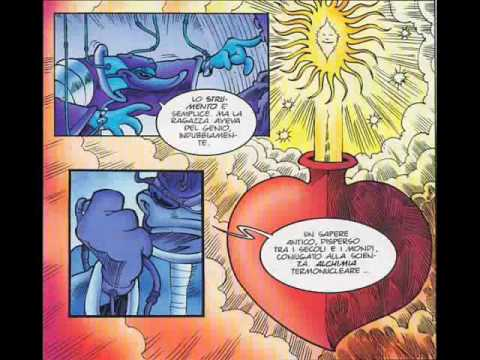

In [7]:
#YouTubeVideo(vid) #gives error
YouTubeVideo("luRTDrD5GtY")

In [8]:
df= pd.read_csv("vocabulary.csv")
df.head(5)

,Index,TrainVideoCount,KnowledgeGraphId,Name,WikiUrl,Vertical1,Vertical2,Vertical3,WikiDescription
0,3,378135,/m/01jddz,Concert,https://en.wikipedia.org/wiki/Concert,Arts & Entertainment,NaN,NaN,A concert is a live music performance in front...
1,7,200813,/m/0k4j,Car,https://en.wikipedia.org/wiki/Car,Autos & Vehicles,NaN,NaN,"A car is a wheeled, self-powered motor vehicle..."
2,8,181579,/m/026bk,Dance,https://en.wikipedia.org/wiki/Dance,Arts & Entertainment,NaN,NaN,Dance is a performance art form consisting of ...
3,11,135357,/m/02wbm,Food,https://en.wikipedia.org/wiki/Food,Food & Drink,NaN,NaN,Food is any substance consumed to provide nutr...
4,12,130835,/m/02vx4,Association football,https://en.wikipedia.org/wiki/Association_foot...,Sports,NaN,NaN,"Association football, more commonly known as f..."


In [9]:
ans= df.loc[df['Index']==seg_labels_r1[0][0]]
ans 

,Index,TrainVideoCount,KnowledgeGraphId,Name,WikiUrl,Vertical1,Vertical2,Vertical3,WikiDescription
831,1444,666,/m/02gln,Donald Duck,https://en.wikipedia.org/wiki/Donald_Duck,Arts & Entertainment,NaN,NaN,Donald Duck is a cartoon character created in ...


In [10]:
#Video: Donald Duck
#column name: Name

#Label: Arts & Entertainment
#column name: Vertical1

In [11]:
df['Vertical1'].nunique()

24